In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.head()

,Unnamed: 0,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_asset_value,loan_status
0,0,2,1,0,16.077274,17.213369,12,778,17.741436,1
1,1,0,0,1,15.226498,16.316947,8,417,16.648724,0
2,2,3,1,0,16.023785,17.206658,20,506,17.870768,0
3,3,3,1,0,15.919645,17.239773,8,467,17.780126,0
4,4,5,0,1,16.097893,17.001863,20,382,17.822844,0


In [4]:
df=df.drop('Unnamed: 0',axis=1)

In [7]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=0)

In [10]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=5, max_depth= 15)

In [11]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, max_features=5)

In [12]:
pred_train = rf.predict(X_train)

In [ ]:
# Training Evaluation
model_train_accuracy = accuracy_score(y_train, pred_train) # Calculate Accuracy
model_train_f1 = f1_score(y_train, pred_train, average='weighted') # Calculate F1-score
model_train_precision = precision_score(y_train, pred_train) # Calculate Precision
model_train_recall = recall_score(y_train, pred_train) # Calculate Recall
model_train_rocauc_score = roc_auc_score(y_train, pred_train)

In [17]:
pred_test = rf.predict(X_test)

In [18]:
# Test Evaluation
model_test_accuracy = accuracy_score(y_test, pred_test) # Calculate Accuracy
model_test_f1 = f1_score(y_test, pred_test, average='weighted') # Calculate F1-score
model_test_precision = precision_score(y_test, pred_test) # Calculate Precision
model_test_recall = recall_score(y_test, pred_test) # Calculate Recall
model_test_rocauc_score = roc_auc_score(y_test, pred_test)

In [19]:
print('Model performance for Training set')
print("- Accuracy: {:.4f}".format(model_train_accuracy))
print('- F1 score: {:.4f}'.format(model_train_f1))
    
print('- Precision: {:.4f}'.format(model_train_precision))
print('- Recall: {:.4f}'.format(model_train_recall))
print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9736
- F1 score: 0.9735
- Precision: 0.9760
- Recall: 0.9817
- Roc Auc Score: 0.9709


In [24]:
preds_test = pd.DataFrame({
    'loan_status_pred': pred_test,
    'loan_status_true': y_test
})


In [25]:
preds_test

,loan_status_pred,loan_status_true
1972,1,1
528,1,1
3540,1,1
87,0,0
1621,0,0
...,...,...
3652,1,1
212,0,0
3797,1,1
1064,1,1


In [27]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

In [28]:
thresholds

array([inf,  1.,  0.])

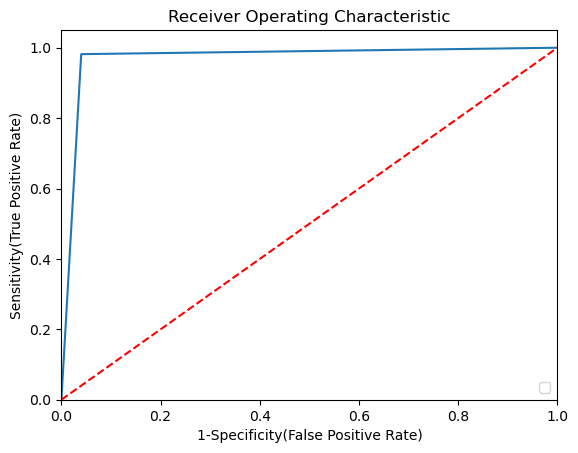

In [34]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
#plt.savefig("auc.png")
plt.show() 

## Serialization and Deserialization

In [39]:
import joblib
joblib.dump(rf,"my_trained_model.pkl")

['my_trained_model.pkl']

- Deserialization 
- Given to other team for use

In [40]:
final_model = joblib.load('my_trained_model.pkl')

In [42]:
final_model

RandomForestClassifier(max_depth=15, max_features=5)

In [43]:
rf

RandomForestClassifier(max_depth=15, max_features=5)

In case of linear or logistic regression we can store all the coeff there in new model

## Package and Module

In [1]:
import PackageA

In [5]:
from PackageA import f1,f2

In [3]:
f1.print_something()

'Output from f1'

In [6]:
f2.print_something()

'Output from f2'

In [7]:
from PackageA.subpacka import f3,f4

In [8]:
f3.print_something()

'Output from f3'

In [9]:
f4.print_something()

'Output from f4'

In [11]:
from PackageA.subpackb import f5

In [12]:
f5.print_something()

'Output from f5'